# **Import Data**

In [2]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# **Prepare data**

In [3]:
dataset=datasets.load_breast_cancer()
dataset

print(dataset.data.shape)
print(dataset.target.shape)

(569, 30)
(569,)


# **K mean model**

In [4]:
kmeans = KMeans(n_clusters=10, random_state=117)
prediction = kmeans.fit_predict(dataset.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[8 8 1 2 1 0 1 0 0 0 7 4 4 7 0 7 7 4 6 0 2 5 7 6 8 4 7 4 4 4 1 0 4 1 4 4 0
 2 0 0 0 2 1 0 0 1 5 0 2 0 2 0 2 4 7 2 8 7 2 5 5 5 7 5 0 7 5 2 5 2 8 5 1 0
 2 4 2 1 1 2 2 2 6 4 2 1 0 1 2 0 0 0 0 0 7 1 2 5 2 0 0 5 2 5 5 0 2 2 6 2 5
 2 0 5 5 2 5 7 4 4 2 1 6 0 2 0 0 1 0 1 2 7 4 7 1 2 2 2 7 5 5 4 2 2 5 2 2 0
 0 0 2 5 5 5 0 2 4 7 2 2 2 1 8 2 6 0 5 4 1 0 2 7 7 5 5 5 5 7 2 2 3 8 4 2 7
 5 4 2 2 2 0 2 5 0 0 2 0 4 1 7 2 4 8 7 2 7 5 4 2 7 1 2 3 7 0 0 2 5 8 6 0 0
 5 7 0 0 5 0 2 0 4 2 2 8 5 0 3 1 0 4 0 2 2 0 1 5 2 2 5 2 8 2 8 4 8 0 8 7 4
 7 8 4 4 7 4 3 5 0 2 5 0 2 6 5 4 2 2 4 0 0 1 2 1 7 2 2 2 2 5 2 0 0 2 2 2 0
 5 2 0 5 8 2 1 5 2 2 2 5 0 0 2 0 2 2 5 2 2 1 5 2 5 1 2 8 2 2 0 2 7 7 7 2 5
 2 2 4 2 8 5 3 0 5 5 1 2 5 2 7 2 2 2 7 3 7 2 2 2 0 5 5 2 2 2 7 0 8 1 2 3 6
 4 0 1 8 0 7 5 0 0 2 2 5 2 2 2 0 2 0 2 4 5 5 4 8 2 0 0 2 2 2 4 2 2 2 2 2 7
 2 4 2 2 2 5 7 7 2 5 1 2 2 2 0 2 0 5 5 5 2 5 2 0 2 1 1 0 0 2 0 0 0 2 4 0 5
 4 2 4 0 0 8 2 1 2 0 2 0 2 2 2 5 1 9 0 2 0 0 0 5 4 2 5 2 7 2 5 2 0 0 2 7 2
 0 0 0 7 2 0 1 2 7 2 4 4 

# **Scatter plot of the data point**

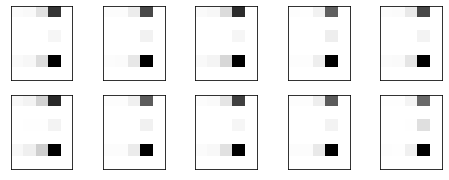

In [5]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [6]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(dataset.target, labels)

0.9068541300527241

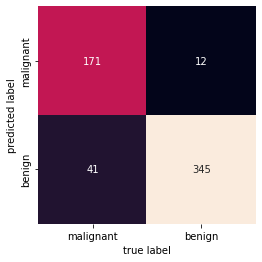

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');